In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_predict,RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report
from scipy.stats import randint
import joblib

## Data prep

In [2]:
df=fetch_openml('mnist_784',as_frame=False)

In [3]:
def plot_image(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.show()

In [4]:
X,y=df.data,df.target

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

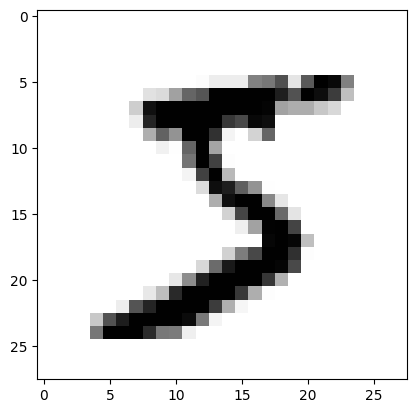

In [7]:
plot_image(X[0])

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Model - KNN

In [10]:
knn=KNeighborsClassifier()

In [ ]:
strat=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
y_pred=cross_val_predict(knn,X,y,cv=strat,verbose=3 )
print(classification_report(y,y_pred))

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6903
           1       0.96      0.99      0.98      7877
           2       0.98      0.96      0.97      6990
           3       0.97      0.97      0.97      7141
           4       0.98      0.97      0.97      6824
           5       0.96      0.97      0.97      6313
           6       0.98      0.99      0.98      6876
           7       0.96      0.97      0.97      7293
           8       0.99      0.93      0.96      6825
           9       0.95      0.96      0.96      6958

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000



## Hyperparameter tuning

In [12]:
param_distrib={
    'n_neighbors':randint(low=3,high=20),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
random_search=RandomizedSearchCV(
    param_distributions=param_distrib,
    estimator=knn,
    cv=5,
    verbose=3,
    n_iter=150,
    n_jobs=4,
    random_state=42
)

In [13]:
random_search.fit(X_test,y_test)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


,estimator,KNeighborsClassifier()
,param_distributions,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': <scipy.stats....0023DA7857B10>, 'weights': ['uniform', 'distance']}"
,n_iter,150
,scoring,None
,n_jobs,4
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [15]:
best_model=random_search.best_estimator_

In [16]:
best_model

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [17]:
joblib.dump(best_model,'knn')

['knn']